# EX 3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import numpy as np

import random as rd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd
import networkx as nx
import seaborn as sns

sns.set()

In [2]:
class Graph(nx.Graph):
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self

    def barabasi_albert_model(self, m0, n, iterations, inicial_praph = None):
        if inicial_praph:
            g = inicial_praph
        else:
            g = nx.complete_graph(m0)
        degrees = {note:degre for note,degre in g.degree() }
        for node in range(m0, m0 + iterations):
            values = np.array(list(degrees.values()))
            nodes_to_conect = np.random.choice(list(degrees.keys()), size = n, replace=False, p = values/sum(values))
            degrees[node] = n
            for node_to_conect in nodes_to_conect:
                degrees[node_to_conect] += 1
            g.add_edges_from([[node, i] for i in nodes_to_conect ])
        return g
        
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


In [3]:
def sim_hit_time(g, start_node):
    hit_time = {start_node: 0}
    node_to_hit = [start_node]
    node_to_hit
    for node in node_to_hit:
        for nb in g.neighbors(node):
            if nb not in node_to_hit:
                node_to_hit.append(nb)
    nr_to_hit = len(node_to_hit)
    moves_history = [start_node]
    curent_node = start_node
    time = 0
    hits = 1
    while hits < nr_to_hit:
        time+=1
        curent_node = np.random.choice(list(g.neighbors(curent_node)))
        moves_history.append(curent_node)
        if curent_node not in hit_time:
            hit_time[curent_node] = time
            hits += 1
    return hit_time, moves_history

## random_graph

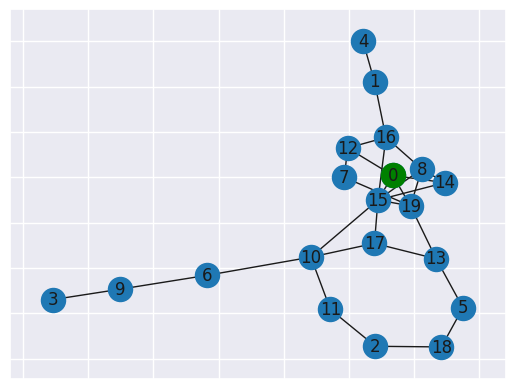

In [4]:
n = 20
p = 0.2
start_node = 0

g1 = Graph().random_graph(n, p)
pos = nx.spring_layout(g1, seed=3068)
nx.draw_networkx(g1, pos)
nx.draw_networkx_nodes(g1, pos, nodelist=[start_node], node_color="green")

In [5]:
hit_time, moves_history = sim_hit_time(g1,start_node)

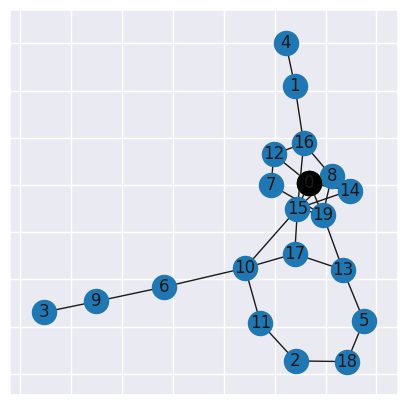

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize = (5,5))

def animate_ex_3(i):
    ax.cla()
    nx.draw_networkx(g1, pos ,ax=ax)
    nx.draw_networkx_nodes(g1, pos, nodelist = moves_history[:i+1], node_color="orange", ax=ax)
    plt.plot()
    
    nx.draw_networkx_nodes(g1, pos, nodelist=[start_node], node_color="green", ax=ax)
    nx.draw_networkx_nodes(g1, pos, nodelist=[moves_history[i]], node_color="black", ax=ax)
    if i == len(moves_history)-1:
        nx.draw_networkx_nodes(g1, pos, nodelist=[moves_history[-1]], node_color="red", ax=ax)
    return ax,
random_grapha_anim = matplotlib.animation.FuncAnimation(fig, animate_ex_3, frames=len(moves_history))

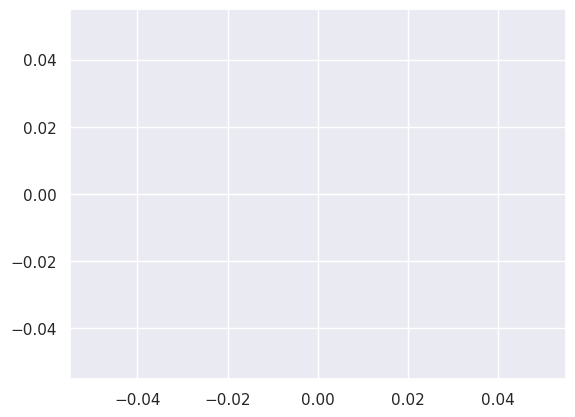

In [7]:
random_grapha_anim

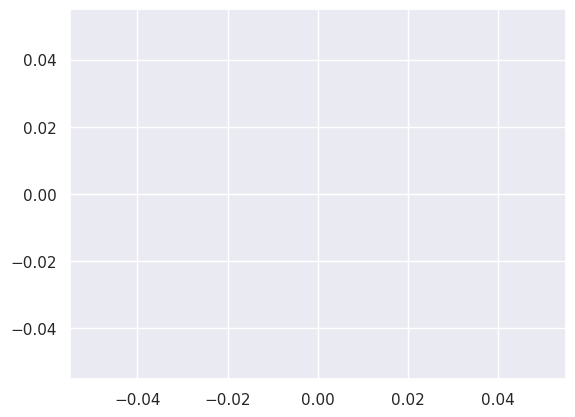

In [8]:
random_grapha_anim.save(f"ex_3_random_grapha_anim.gif")

### avr. hit_time

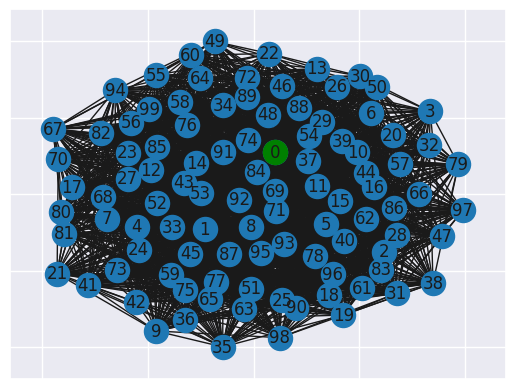

In [9]:
n = 100
p = 0.5
start_node = 0

g1 = Graph().random_graph(n, p)
pos = nx.spring_layout(g1, seed=3068)
# pos = nx.circular_layout(g1)
nx.draw_networkx(g1, pos)
nx.draw_networkx_nodes(g1, pos, nodelist=[start_node], node_color="green")

In [10]:
sim = []
for i in range(1000):
    hit_time, _ = sim_hit_time(g1,start_node)
    sim.append(hit_time)

Mean hit time: 100.33239


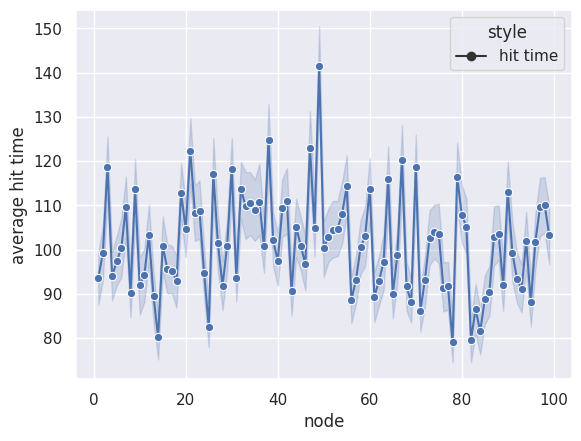

In [11]:
sim_fd = pd.DataFrame(sim)
df = sim_fd.melt()
df["style"] = "hit time"
print("Mean hit time:", df["value"].mean())
sns.lineplot(df[df["value"] != start_node], x = "variable", y = "value",  markers=True , style="style")
plt.ylabel("average hit time")
plt.xlabel("node")
plt.show()

## Watts Strogatz 

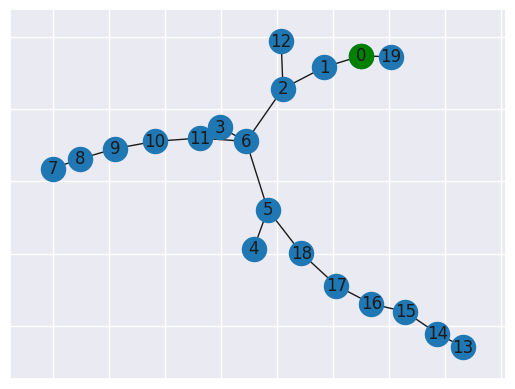

In [12]:
n = 20
k = 2
p = 0.2
start_node = 0

g2 = Graph().Watts_Strogatz_model( n , k, p)

pos = nx.spring_layout(g2, seed=3068)
# pos = nx.circular_layout(g2)
nx.draw_networkx(g2, pos)
nx.draw_networkx_nodes(g2, pos, nodelist=[start_node], node_color="green")

In [13]:
hit_time, moves_history = sim_hit_time(g2, start_node)

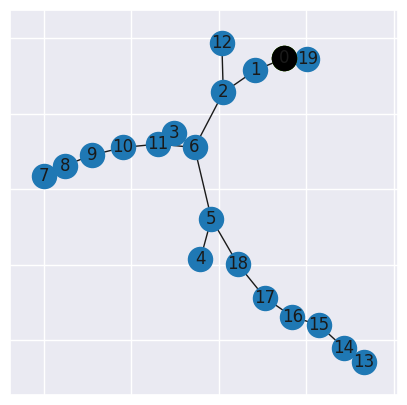

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize = (5,5))

def animate_ex_3(i):
    ax.cla()
    nx.draw_networkx(g2, pos ,ax=ax)
    nx.draw_networkx_nodes(g2, pos, nodelist = moves_history[:i+1], node_color="orange", ax=ax)
    plt.plot()
    
    nx.draw_networkx_nodes(g2, pos, nodelist=[start_node], node_color="green", ax=ax)
    nx.draw_networkx_nodes(g2, pos, nodelist=[moves_history[i]], node_color="black", ax=ax)
    if i == len(moves_history)-1:
        nx.draw_networkx_nodes(g2, pos, nodelist=[moves_history[-1]], node_color="red", ax=ax)
    return ax,
watts_strogatz_anim = matplotlib.animation.FuncAnimation(fig, animate_ex_3, frames=len(moves_history))

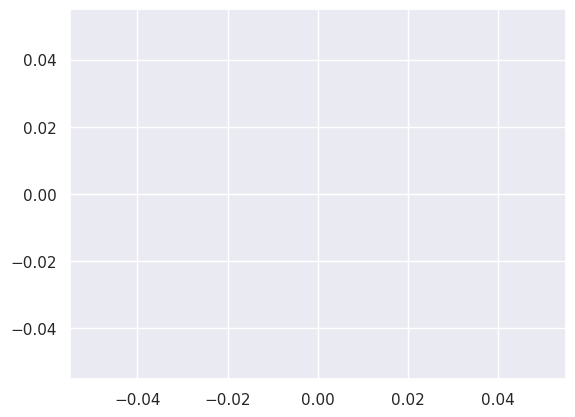

In [15]:
watts_strogatz_anim

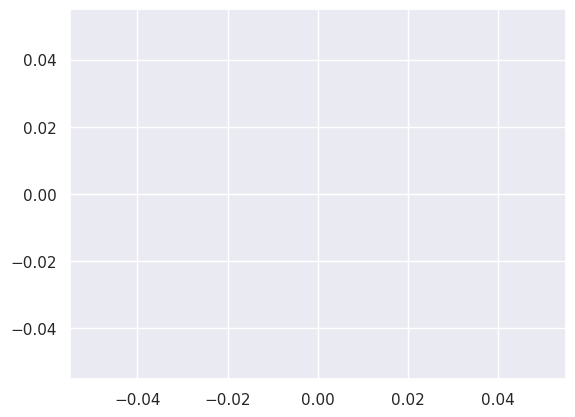

In [16]:
watts_strogatz_anim.save(f"ex_3_watts_strogatz_anim.gif")

### avr. hit_time

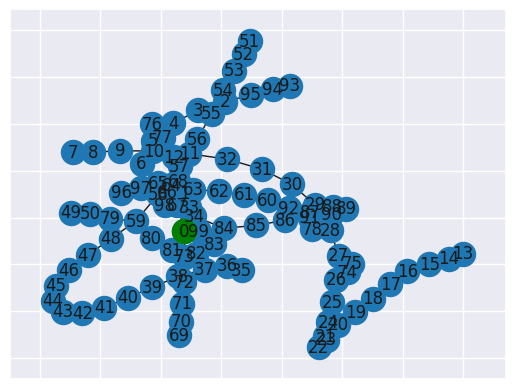

In [20]:
n = 100
k = 2
p = 0.2
start_node = 0
g2 = Graph().Watts_Strogatz_model(n , k, p)
pos = nx.spring_layout(g2, seed=3068)
# pos = nx.circular_layout(g2)

nx.draw_networkx(g2, pos)

nx.draw_networkx_nodes(g2, pos, nodelist=[start_node], node_color="green")

In [21]:
sim_watts_strogatz= []
for i in range(1000):
    hit_time, _ = sim_hit_time(g2,start_node)
    sim_watts_strogatz.append(hit_time)

Mean hit time: 1362.79436


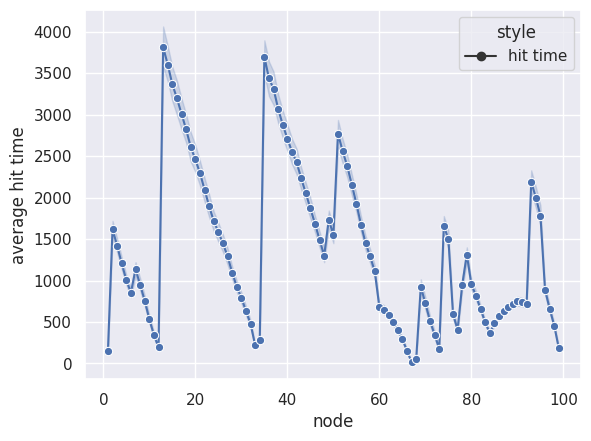

In [22]:
sim_fd = pd.DataFrame(sim_watts_strogatz)
df = sim_fd.melt()
df["style"] = "hit time"
print("Mean hit time:", df["value"].mean())
sns.lineplot(df[df["value"] != start_node], x = "variable", y = "value",  markers=True , style="style")
plt.ylabel("average hit time")
plt.xlabel("node")
plt.show()

## barabasi albert

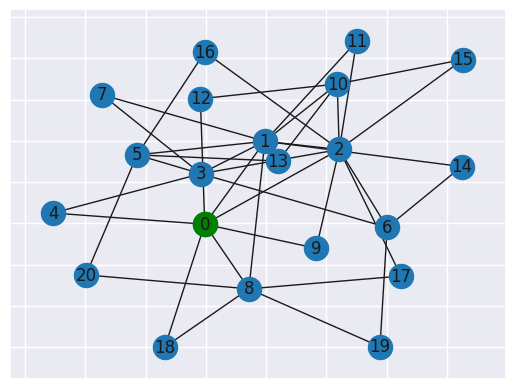

In [23]:
m0 = 3
n = 2
iterations  = 18
g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


pos = nx.spring_layout(g3, seed=3068)
# pos = nx.circular_layout(g2)
nx.draw_networkx(g3, pos)
nx.draw_networkx_nodes(g3, pos, nodelist=[start_node], node_color="green")

In [24]:
hit_time, moves_history = sim_hit_time(g3, start_node)

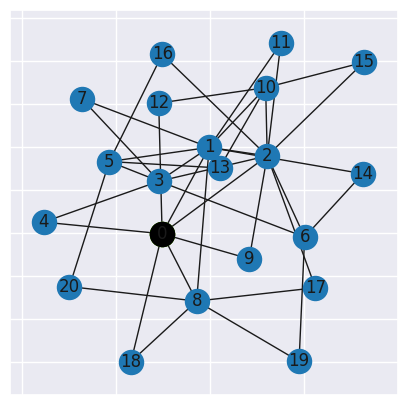

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize = (5,5))

def animate_ex_3(i):
    ax.cla()
    nx.draw_networkx(g3, pos ,ax=ax)
    nx.draw_networkx_nodes(g3, pos, nodelist = moves_history[:i+1], node_color="orange", ax=ax)
    plt.plot()
    
    nx.draw_networkx_nodes(g3, pos, nodelist=[start_node], node_color="green", ax=ax)
    nx.draw_networkx_nodes(g3, pos, nodelist=[moves_history[i]], node_color="black", ax=ax)
    if i == len(moves_history)-1:
        nx.draw_networkx_nodes(g3, pos, nodelist=[moves_history[-1]], node_color="red", ax=ax)
    return ax,
barabasi_albert_anim = matplotlib.animation.FuncAnimation(fig, animate_ex_3, frames=len(moves_history))

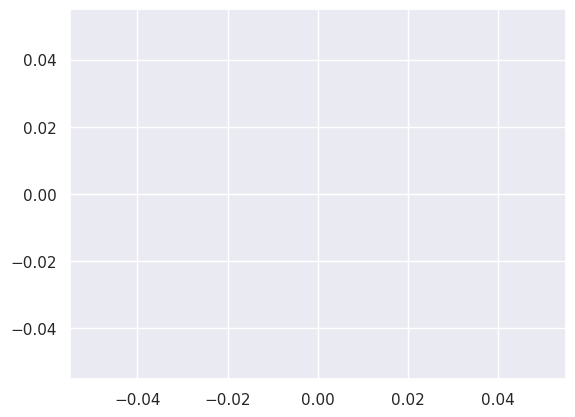

In [26]:
barabasi_albert_anim

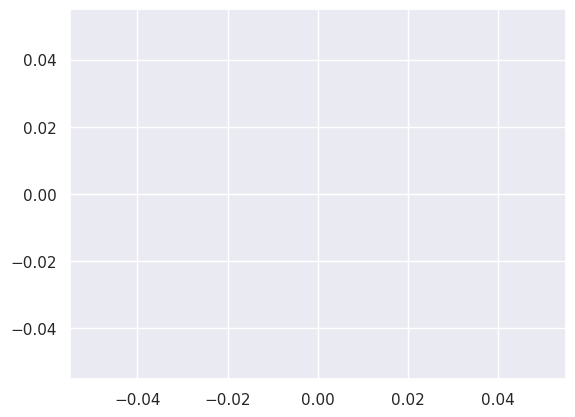

In [27]:
barabasi_albert_anim.save(f"ex_3_watts_barabasi_albert.gif")

### avr. hit_time

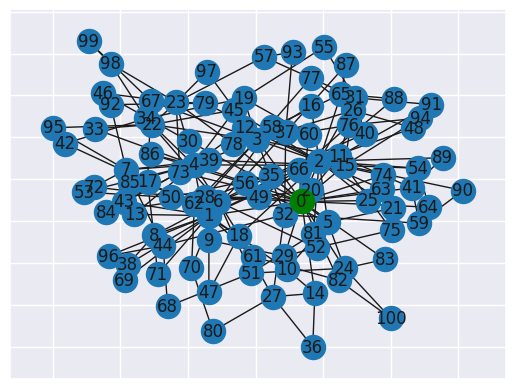

In [28]:
m0 = 3
n = 2
iterations  = 98
start_node = 0

g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


pos = nx.spring_layout(g3, seed=3068)
# pos = nx.circular_layout(g3)

nx.draw_networkx(g3, pos)

nx.draw_networkx_nodes(g3, pos, nodelist=[start_node], node_color="green")

In [29]:
sim_barabasi_albert = []
for i in range(1000):
    hit_time, _ = sim_hit_time(g3, start_node)
    sim_barabasi_albert.append(hit_time)

Mean hit time: 190.9280495049505


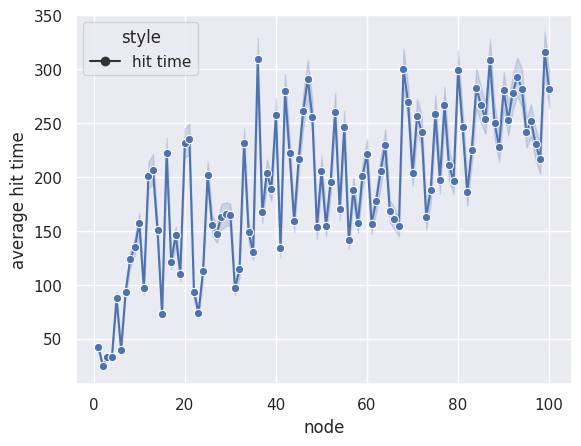

In [30]:
sim_fd = pd.DataFrame(sim_barabasi_albert)
df = sim_fd.melt()
df["style"] = "hit time"
print("Mean hit time:", df["value"].mean())
sns.lineplot(df[df["value"] != start_node], x = "variable", y = "value",  markers=True , style="style")
plt.ylabel("average hit time")
plt.xlabel("node")
plt.show()